# Proyecto Final: Text Mining and Image recognition
 * Franz Schubert Castillo Colocho: 22003738.
* Doris Andrea Paz Garcia: 22005266


## Problema No.1

In [ ]:
#Cargamos librerías
import re
import glob
import pandas as pd
import numpy as np
import spacy
from wordcloud import WordCloud
import matplotlib.pyplot as plt

In [ ]:
#Cargamos el dataset
df = pd.read_csv('tw_source.csv', encoding = "ISO-8859-1", header=None)
df.shape

(1600000, 6)

#### Extracción de nombres y usuarios de Twitter

In [ ]:
rgx_user = r'@(\w+)'


In [ ]:
def findUsers(tweet):
    found = re.findall(rgx_user, tweet)
    return found

test_tweet = "@Alvoza esto es un tweet @test_user "
users_found = findUsers(test_tweet)
print(users_found)


['Alvoza', 'test_user']


#### Contar cantidad de usuarios.

In [ ]:
tweets = df[5]

In [ ]:
count = [] #Almacena la cantidad de usuarios encontrados
for tweet in tweets:
    users_found = findUsers(tweet)
    if users_found:
        for u in users_found:
            count.append(u)

In [ ]:
total_users = len(count)
print(f"Total de usuarios encontrados: {total_users}")


Total de usuarios encontrados: 786609


#### Encontrar el Top 3 de los usuarios

In [ ]:
df0=pd.DataFrame({'users': count})
df1 = pd.DataFrame(data = df0['users'].value_counts())
df1['users'].nlargest(3).index.tolist()

['mileycyrus', 'tommcfly', 'ddlovato']

#### Definimos los 3 usuarios

In [ ]:
top_user1 = '(@mileycyrus)( |$)'
top_user2 = '(@tommcfly)( |$)'
top_user3 = '(@ddlovato)( |$)'

#### Creación de los Corpus

In [ ]:
def get_corpus(regex):
    Content = []
    Id = []
    Timestamp = []
    Len = []
    for i in range(len(df)):
        if re.match(regex, df[5][i]):
            Content.append(df[5][i])
            Id.append(df[4][i])
            Timestamp.append(df[2][i])
            Len.append(len(df[5][i]))

    corpus = pd.DataFrame({'Content': Content, 'Id': Id, 'Timestamp': Timestamp, 'Len': Len})
    return corpus

In [ ]:
corpus1 = get_corpus(top_user1)
corpus2 = get_corpus(top_user2)
corpus3 = get_corpus(top_user3)

In [ ]:
corpus1

,Content,Id,Timestamp,Len
0,@mileycyrus hahaha dont be like that one time ...,kristenn_lynn,Mon Apr 06 23:30:57 PDT 2009,107
1,"@mileycyrus i have the same problem, but it's ...",nathiuria,Tue Apr 07 00:45:20 PDT 2009,137
2,@mileycyrus I guess counting sheep didn't work...,amyamoore,Tue Apr 07 00:49:07 PDT 2009,72
3,@mileycyrus I would too if it meant spending a...,xdokkenx,Tue Apr 07 00:49:44 PDT 2009,100
4,@mileycyrus AWWW u seriously have the cutest d...,XFearLessX,Tue Apr 07 00:56:41 PDT 2009,112
...,...,...,...,...
3765,@mileycyrus Please do another concert in Manch...,lozlouise,Tue Jun 16 04:45:43 PDT 2009,133
3766,@mileycyrus http://twitpic.com/7f5fy - I love ...,Maddeeeeee,Tue Jun 16 07:31:21 PDT 2009,112
3767,@mileycyrus i see the photos of your KISS iss ...,LizzMartin,Tue Jun 16 07:55:55 PDT 2009,74
3768,@mileycyrus i am definitley definitley getting...,lucyannedixon,Tue Jun 16 08:04:20 PDT 2009,139


#### Normalización

In [ ]:
t = corpus2['Content'].to_list()
for index, review in enumerate(t):
    review = review.replace('<br>', '')
    review = review.replace('&#39;', "'")
    review = review.replace(u'\xa0', " ")
    review = review.replace('&amp', "&")
    review = review.replace('ï¿½', "'")
    review = review.replace('&quot;', '"')
    review = review.replace('&lt;3', '<3')
    review = review.replace('@mileycyrus', '')
    review = review.replace('@tommcfly', '')
    review = review.replace('@ddlovato', '')
    punctuation = '[$-/:-?{-~!"^_`\[\]]'
    review = re.sub(punctuation, "", review)
    review = review.lower()
    review = review.rstrip('\n')
    t[index] = review

corpus2['Content'] = t
corpus2['Content']



0        hey saw u guys play @ pushoverdidnt get 2 mee...
1        good morning tom why cant i send you a messag...
2        did you know that johnsons baby use animals l...
3        hey no chance of adding brighton or eastbourn...
4        have fun tom i need to buy eclipse too but i ...
                              ...                        
3609     when the sun shines they slip into the shades...
3610                 you should record star girl with jb 
3611     why you at the studio then  just watched a vi...
3612     gonna make a trip to england in the holidays ...
3613     heya tom you should follow peter facinelli fr...
Name: Content, Length: 3614, dtype: object

In [ ]:
t = corpus3['Content'].to_list()
for index, review in enumerate(t):
    review = review.replace('<br>', '')
    review = review.replace('&#39;', "'")
    review = review.replace(u'\xa0', " ")
    review = review.replace('&amp', "&")
    review = review.replace('ï¿½', "'")
    review = review.replace('&quot;', '"')
    review = review.replace('&lt;3', '<3')
    review = review.replace('@mileycyrus', '')
    review = review.replace('@tommcfly', '')
    review = review.replace('@ddlovato', '')
    punctuation = '[$-/:-?{-~!"^_`\[\]]'
    review = re.sub(punctuation, "", review)
    review = review.lower()
    review = review.rstrip('\n')
    t[index] = review

corpus3['Content'] = t

In [ ]:
def normalize (cp):
  t = cp.to_list()
  for index, review in enumerate(t):
      review = review.replace('<br>', '')
      review = review.replace('&#39;', "'")
      review = review.replace(u'\xa0', " ")
      review = review.replace('&amp', "&")
      review = review.replace('ï¿½', "'")
      review = review.replace('&quot;', '"')
      review = review.replace('&lt;3', '<3')
      review = review.replace('@mileycyrus', '')
      review = review.replace('@tommcfly', '')
      review = review.replace('@ddlovato', '')
      punctuation = '[$-/:-?{-~!"^_`\[\]]'
      review = re.sub(punctuation, "", review)
      review = review.lower()
      review = review.rstrip('\n')
      t[index] = review
      print(t)
      return t

In [ ]:
corpus1['Content'] = normalize(corpus1['Content'])
corpus2['Content'] = normalize(corpus2['Content'])
corpus3['Content'] = normalize(corpus3['Content'])

[' hahaha dont be like that one time in ny when you got 30 mins of sleep then got sick  love you', ' i have the same problem but its 443 here lets see if counting works123456 57 58 132 133 134 no zs for me ', ' i guess counting sheep didnt work  hope you get some sleep', ' i would too if it meant spending a day in heaven wmy mom and getting to see her again ', ' awww u seriously have the cutest dog miley sorry your not with her now  hope u get some sleep xoxo', ' httptwitpiccom2xszg  napping at this point you may need a few of those gma is gonna come early ', ' where did you find that quote no dont answer better sleep xoxo from germany where its already morning  ', ' httptwitpiccom2y606  i want a sofie  shes helllza cute', ' ouch mine too ', ' dude i have to go on a 4 mile run in cold ass boston after waking up just now this sucks ', ' aww i feel u u just woke up for school  hopefully ill meet u today hah 3', ' awe i feel u i just woke up for school  hopefully we both have a better res

#### Tokenización

In [ ]:
nlp = spacy.load("en_core_web_sm")

In [ ]:
def tokenizacion(corpus):
    newCorpus = []
    for doc in corpus:
        newCorpus.append(nlp(doc))
    return newCorpus

In [ ]:
corpus1['Content'] = tokenizacion(corpus1['Content'])
corpus2['Content'] = tokenizacion(corpus2['Content'])
corpus3['Content'] = tokenizacion(corpus3['Content'])

#### StopWords Removal

In [ ]:
def removeStops(corpus):
    newCorpus = []
    for doc in corpus:
        s = ""
        for token in doc:
            if(token.is_stop == False):
                s = s + token.text + " "
        newCorpus.append(s.strip())
    return newCorpus

In [ ]:
corpus1['Content'] = removeStops(corpus1['Content'])
corpus2['Content'] = removeStops(corpus2['Content'])
corpus3['Content'] = removeStops(corpus3['Content'])

### Stemming y Lemmatización

In [ ]:
def stemmingLemmating(corpus):
    documents = tokenizacion(corpus)
    newCorpus = []
    for doc in documents:
        s = ""
        for token in doc:
            s = s + token.lemma_ + " "
        newCorpus.append(s.strip())
    return newCorpus

In [ ]:
corpus1['Content'] = stemmingLemmating(corpus1['Content'])
corpus2['Content'] = stemmingLemmating(corpus2['Content'])
corpus3['Content'] = stemmingLemmating(corpus3['Content'])

#### Construcción de la Matriz de Confusión

In [ ]:
def listToString(s):
    strX = ""
    for palabra in s:
        strX = strX + palabra + " "
    return strX

In [ ]:
strCorpus = listToString(corpus1['Content'])
strCorpus = strCorpus.strip().split(' ')
#strCorpus

In [ ]:
strCorpus2 = listToString(corpus2['Content'])
strCorpus2 = strCorpus2.strip().split(' ')

strCorpus3 = listToString(corpus3['Content'])
strCorpus3 = strCorpus3.strip().split(' ')

In [ ]:
strCorpus = set(strCorpus)
strCorpus2 = set(strCorpus2)
strCorpus3 = set(strCorpus3)

In [ ]:
corpusCols = list(strCorpus)
corpusRows = range(0, len(corpus1['Content']))

In [ ]:
corpusCols2 = list(strCorpus2)
corpusRows2 = range(0, len(corpus2['Content']))

corpusCols3 = list(strCorpus3)
corpusRows3 = range(0, len(corpus3['Content']))

In [ ]:
def generateEmptyTF(cols, rows):
    outDf = pd.DataFrame(index=rows, columns=cols)
    outDf = outDf.fillna(0)
    return outDf

In [ ]:
tfCorpus = generateEmptyTF(corpusCols, corpusRows)
#tfCorpus

In [ ]:
tfCorpus2 = generateEmptyTF(corpusCols2, corpusRows2)
tfCorpus3 = generateEmptyTF(corpusCols3, corpusRows3)

#### Calculo de la TF

In [ ]:
def calculoTF(corpus, df):
    corpus = tokenizacion(corpus)
    for index, doc in enumerate(corpus):
        docLen = len(doc)
        for word in doc:
            try:
                colIndex = list(df.columns).index(word.text)
                df.iloc[index, colIndex] =  df.iloc[index, colIndex] + 1
            except:
                pass
        df.iloc[index, :] = df.iloc[index, :] / docLen
    return df

In [ ]:
tfMatrix = calculoTF(corpus1['Content'], tfCorpus)
tfMatrix

,,manchesterin,gemany,fans,modelkeep,yayyyy,goodmorning,sung,care,@emilyosment,...,infact,model,south,crude,bajillion,@mileycsupporter,11615,wendy,acceptance,reckon
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3765,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3766,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3767,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3768,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
tfMatrix2 = calculoTF(corpus2['Content'], tfCorpus2)
tfMatrix3 = calculoTF(corpus3['Content'], tfCorpus3)

#### WordCloud

In [ ]:
wordcount = {}
for column in tfMatrix:
  wordcount[column] = tfMatrix[column].sum()

wordcloud = sorted(wordcount, key=wordcount.get, reverse=True)[:20]

cloud = {}
for i in range(len(wordcloud)):
  cloud[wordcloud[i]] = wordcount[wordcloud[i]]

cloud

{'miley': 108.01407296114692,
 'love': 105.68467220773722,
 'not': 75.14985299100624,
 'vote': 71.14608937416213,
 'good': 63.46400874947281,
 'u': 62.4469140828735,
 'm': 61.56785773136392,
 'come': 45.24764006203634,
 's': 38.70992648991875,
 'hope': 36.385100058180555,
 'like': 27.44238373855247,
 'luck': 25.930519099923124,
 'win': 25.317173464650246,
 'wish': 24.90170703479527,
 'go': 24.088172351384422,
 'feel': 22.11082430641254,
 'fan': 22.101618642795113,
 'hey': 21.8989525670408,
 'amazing': 21.830344492109198,
 'movie': 21.10427173617576}

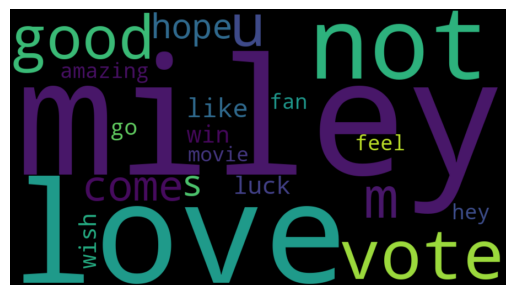

In [ ]:
wc = WordCloud(width=900,height=500, max_words=1628,relative_scaling=1,normalize_plurals=False).generate_from_frequencies(cloud)

plt.imshow(wc, interpolation='bilinear')
plt.axis("off")
plt.show()

In [ ]:
wordcount2 = {}
for column in tfMatrix2:
  wordcount2[column] = tfMatrix2[column].sum()

wordcloud2 = sorted(wordcount2, key=wordcount2.get, reverse=True)[:20]

cloud2 = {}
for i in range(len(wordcloud2)):
  cloud2[wordcloud2[i]] = wordcount2[wordcloud2[i]]

cloud2

{'tom': 96.50089034632379,
 'not': 79.84109946211339,
 'love': 59.21388372549363,
 'm': 50.996018279106515,
 'good': 45.62295380058538,
 'come': 45.404287765897664,
 'guy': 34.031359979889395,
 'miss': 32.99300364668012,
 'like': 31.749175983115613,
 'brazil': 31.711671090347558,
 'u': 31.220359860111174,
 'xx': 30.701011690407974,
 'x': 30.03344847447015,
 'haha': 29.08178934928161,
 'hi': 27.64033140062552,
 'reply': 27.26480396538446,
 'fan': 22.994324139912372,
 'think': 22.802465894958154,
 'want': 21.741267066267064,
 's': 21.5698757941405}

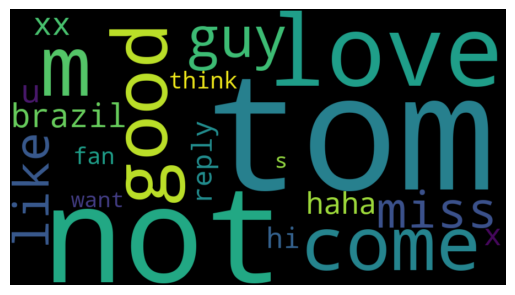

In [ ]:
wc2 = WordCloud(width=900,height=500, max_words=1628,relative_scaling=1,normalize_plurals=False).generate_from_frequencies(cloud2)

plt.imshow(wc2, interpolation='bilinear')
plt.axis("off")
plt.show()

In [ ]:
wordcount3 = {}
for column in tfMatrix3:
  wordcount3[column] = tfMatrix3[column].sum()

wordcloud3 = sorted(wordcount3, key=wordcount3.get, reverse=True)[:20]

cloud3 = {}
for i in range(len(wordcloud3)):
  cloud3[wordcloud3[i]] = wordcount3[wordcloud3[i]]

cloud3

{'demi': 76.88376673492772,
 'love': 72.26796293661619,
 'not': 67.48805664006903,
 'm': 53.04790466814461,
 'wish': 44.128396032072494,
 'come': 43.587641563802556,
 'u': 38.68395433100474,
 's': 36.557670107670106,
 'good': 30.79532616076734,
 'wait': 26.50412658806621,
 'like': 25.00483312983313,
 'hope': 24.42448826829632,
 'haha': 22.37366275365501,
 'want': 20.773785364961835,
 'reply': 19.856413847590318,
 'amazing': 19.62122511561366,
 'go': 19.414761012980826,
 'know': 18.535442232346256,
 'vote': 18.18490164805954,
 'awesome': 17.0468959961607}

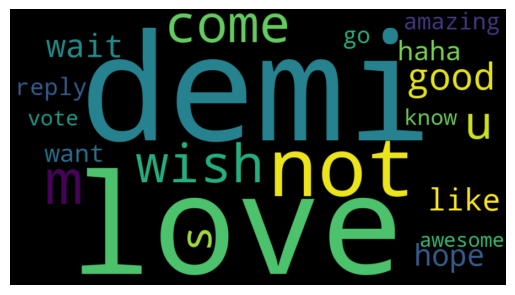

In [ ]:
wc3 = WordCloud(width=900,height=500, max_words=1628,relative_scaling=1,normalize_plurals=False).generate_from_frequencies(cloud3)

plt.imshow(wc3, interpolation='bilinear')
plt.axis("off")
plt.show()

#### Usuarios más populares

['mileycyrus', 'tommcfly', 'ddlovato']

### Conclusión WordCloud No.1
Sentimiento Positivo: Palabras como "love", "good", "hope", "luck", "wish", "amazing", y "fan" sugieren un sentimiento generalmente positivo en los tweets. Estas palabras indican aprecio, admiración y buenos deseos hacia el tema o la persona mencionada.

Acciones y Eventos: Palabras como "vote", "come", "win", y "movie" sugieren que hay eventos o acciones específicas asociadas con Miley. Por ejemplo, podría haber una votación en curso, una nueva película o un concurso donde Miley esté involucrada.

Comunicación Directa: Palabras como "u" (you), "m" (me), y "hey" sugieren que muchos de los tweets pueden estar dirigidos directamente a Miley o a otros usuarios, posiblemente en forma de mensajes de apoyo o comunicación directa.

### Conclusión WordCloud No.2
Sentimiento Positivo: Palabras como "love", "good", "miss", y "fan" sugieren un sentimiento generalmente positivo en los tweets. Estas palabras indican aprecio, admiración y sentimientos afectuosos hacia el tema o la persona mencionada.

Comunicación Directa: Palabras como "u" (you), "m" (me), "hi", "haha", y "reply" sugieren que muchos de los tweets pueden estar dirigidos directamente a Tom o a otros usuarios. Esto indica una comunicación directa y posiblemente respuestas o interacciones con Tom.

Ubicación Específica: La palabra "brazil" sugiere que hay una conexión o mención específica de Brasil en relación con Tom. Esto podría indicar que Tom tiene una base de fans en Brasil o que hubo un evento o situación específica relacionada con él en ese país.

### Conclusión WordCloud No.3
Sentimiento Positivo: Palabras como "love", "wish", "good", "hope", "amazing", y "awesome" sugieren un sentimiento generalmente positivo en los tweets. Estas palabras indican aprecio, admiración y buenos deseos hacia el tema o la persona mencionada.

Comunicación Directa: Palabras como "u" (you), "m" (me), "haha", y "reply" sugieren que muchos de los tweets pueden estar dirigidos directamente a Demi o a otros usuarios. Esto indica una comunicación directa y posiblemente respuestas o interacciones con Demi.

Anticipación y Deseos: Palabras como "wait", "want", y "wish" sugieren un sentimiento de anticipación o deseo en relación con Demi o algo asociado a ella.

## Problema No.2

##Importamos las bibliotecas necesarias

In [ ]:
pip install numpy pandas matplotlib tensorflow scikit-learn

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from tensorflow import keras
from tensorflow.keras import layers
import seaborn as sns

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


##Se carga el dataset

In [ ]:
data = pd.read_csv("train.csv")

##Exploramos dataset

In [ ]:
summary = data.describe()
print(summary)

              label   pixel0   pixel1   pixel2   pixel3   pixel4   pixel5  \
count  11469.000000  11469.0  11469.0  11469.0  11469.0  11469.0  11469.0   
mean       4.438225      0.0      0.0      0.0      0.0      0.0      0.0   
std        2.878112      0.0      0.0      0.0      0.0      0.0      0.0   
min        0.000000      0.0      0.0      0.0      0.0      0.0      0.0   
25%        2.000000      0.0      0.0      0.0      0.0      0.0      0.0   
50%        4.000000      0.0      0.0      0.0      0.0      0.0      0.0   
75%        7.000000      0.0      0.0      0.0      0.0      0.0      0.0   
max        9.000000      0.0      0.0      0.0      0.0      0.0      0.0   

        pixel6   pixel7   pixel8  ...      pixel774      pixel775  \
count  11469.0  11469.0  11469.0  ...  11468.000000  11468.000000   
mean       0.0      0.0      0.0  ...      0.146146      0.096442   
std        0.0      0.0      0.0  ...      5.184509      4.223908   
min        0.0      0.0      0

In [ ]:
data.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,4,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


##Preparamos los datos, separamos las características (píxeles de las imágenes) y las etiquetas (dígitos) del conjunto de datos.


In [ ]:
X = data.drop("label", axis=1).values
y = data["label"].values

##Normalizamos los valores de píxeles dividiendo por 255 para escalarlos en el rango [0, 1]

In [ ]:
X = X / 255.0

##Reshape de datos: debido que cada imagen se almacena como una sola fila en el conjunto de datos, las remodelamos para que tengan una forma de 28x28x1, donde 1 representa la escala de grises


In [ ]:
X = X.reshape(-1, 28, 28, 1)

##Se divide el conjunto de datos en conjuntos de entrenamiento, validación y prueba

In [ ]:
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

##Creación ANN: se crea un modelo secuencial de Keras con capas de aplanamiento, capas densas y una capa de salida.

In [ ]:
ann_model = keras.Sequential([
    layers.Flatten(input_shape=(28, 28, 1)),
    layers.Dense(128, activation="relu"),
    layers.Dense(64, activation="relu"),
    layers.Dense(10, activation="softmax")
])

##Se compila el modelo ANN especificando la función de pérdida y el optimizador

In [ ]:
ann_model.compile(optimizer="adam", loss="sparse_categorical_crossentropy", metrics=["accuracy"])

##Se entrena el modelo ANN en los datos de entrenamiento

In [ ]:
ann_history = ann_model.fit(X_train, y_train, epochs=10, validation_data=(X_val, y_val))

Epoch 1/10
251/251 [==============================] - 4s 9ms/step - loss: 0.5577 - accuracy: 0.8421 - val_loss: nan - val_accuracy: 0.9023
Epoch 2/10
251/251 [==============================] - 2s 7ms/step - loss: 0.2288 - accuracy: 0.9326 - val_loss: nan - val_accuracy: 0.9221
Epoch 3/10
251/251 [==============================] - 1s 5ms/step - loss: 0.1615 - accuracy: 0.9553 - val_loss: nan - val_accuracy: 0.9186
Epoch 4/10
251/251 [==============================] - 1s 5ms/step - loss: 0.1106 - accuracy: 0.9679 - val_loss: nan - val_accuracy: 0.9349
Epoch 5/10
251/251 [==============================] - 1s 4ms/step - loss: 0.0827 - accuracy: 0.9755 - val_loss: nan - val_accuracy: 0.9372
Epoch 6/10
251/251 [==============================] - 1s 4ms/step - loss: 0.0601 - accuracy: 0.9846 - val_loss: nan - val_accuracy: 0.9395
Epoch 7/10
251/251 [==============================] - 1s 4ms/step - loss: 0.0411 - accuracy: 0.9889 - val_loss: nan - val_accuracy: 0.9291
Epoch 8/10
251/251 [=======

##Se crea un modelo secuencial de Keras para la CNN con capas de convolución, agrupación y capas densas.

In [ ]:
cnn_model = keras.Sequential([
    layers.Conv2D(32, (3, 3), activation="relu", input_shape=(28, 28, 1)),
    layers.MaxPooling2D(2, 2),
    layers.Flatten(),
    layers.Dense(128, activation="relu"),
    layers.Dense(10, activation="softmax")
])

##Se compila el modelo CNN de manera similar al modelo ANN

In [ ]:
cnn_model.compile(optimizer="adam", loss="sparse_categorical_crossentropy", metrics=["accuracy"])

##Se entrena el modelo CNN en los datos de entrenamiento

In [ ]:
cnn_history = cnn_model.fit(X_train, y_train, epochs=10, validation_data=(X_val, y_val))

Epoch 1/10
251/251 [==============================] - 6s 20ms/step - loss: 0.4293 - accuracy: 0.8738 - val_loss: nan - val_accuracy: 0.9390
Epoch 2/10
251/251 [==============================] - 6s 23ms/step - loss: 0.1415 - accuracy: 0.9569 - val_loss: nan - val_accuracy: 0.9564
Epoch 3/10
251/251 [==============================] - 6s 23ms/step - loss: 0.0801 - accuracy: 0.9750 - val_loss: nan - val_accuracy: 0.9576
Epoch 4/10
251/251 [==============================] - 5s 19ms/step - loss: 0.0480 - accuracy: 0.9878 - val_loss: nan - val_accuracy: 0.9640
Epoch 5/10
251/251 [==============================] - 7s 26ms/step - loss: 0.0305 - accuracy: 0.9904 - val_loss: nan - val_accuracy: 0.9703
Epoch 6/10
251/251 [==============================] - 5s 18ms/step - loss: 0.0199 - accuracy: 0.9940 - val_loss: nan - val_accuracy: 0.9669
Epoch 7/10
251/251 [==============================] - 5s 19ms/step - loss: 0.0102 - accuracy: 0.9980 - val_loss: nan - val_accuracy: 0.9686
Epoch 8/10
251/251 [

##Se obtienen las probabilidades de predicción para la ANN y la CNN

In [ ]:
y_prob_ann = ann_model.predict(X_test)
y_prob_cnn = cnn_model.predict(X_test)

54/54 [==============================] - 0s 5ms/step


##Se obtiene las clases predichas tomando la clase con la probabilidad más alta

In [ ]:
y_pred_ann = np.argmax(y_prob_ann, axis=1)
y_pred_cnn = np.argmax(y_prob_cnn, axis=1)

##Se calculan las métricas para la ANN y la CNN en el conjunto de prueba

In [ ]:
metrics_ann = classification_report(y_test, y_pred_ann, output_dict=True)
metrics_cnn = classification_report(y_test, y_pred_cnn, output_dict=True)

##Creación de DataFrame para mostrar las métricas

In [ ]:
df_metrics = pd.DataFrame({
    'ANN': metrics_ann['weighted avg'],
    'CNN': metrics_cnn['weighted avg']
})

##Esta es la tabla comparativa de métricas

In [ ]:
print("\nTabla comparativa de métricas:")
print(df_metrics)


Tabla comparativa de métricas:
                   ANN          CNN
precision     0.935991     0.967370
recall        0.934340     0.966880
f1-score      0.934073     0.966959
support    1721.000000  1721.000000


##Se visualizan matrices de confusión: se muestran matrices de confusión para visualizar el rendimiento de la clasificación por clase.


In [ ]:
plt.figure(figsize=(12, 5))

<Figure size 1200x500 with 0 Axes>

<Figure size 1200x500 with 0 Axes>

Text(50.722222222222214, 0.5, 'Valores Verdaderos')

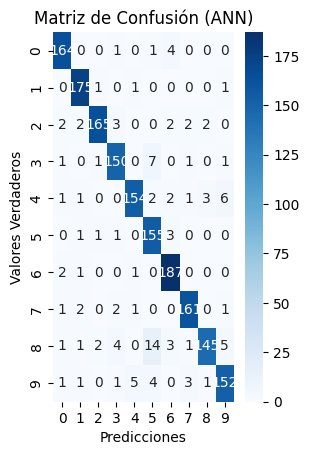

In [ ]:
plt.subplot(1, 2, 1)
cm_ann = confusion_matrix(y_test, y_pred_ann)
sns.heatmap(cm_ann, annot=True, fmt="d", cmap="Blues")
plt.title("Matriz de Confusión (ANN)")
plt.xlabel("Predicciones")
plt.ylabel("Valores Verdaderos")

Text(321.26767676767673, 0.5, 'Valores Verdaderos')

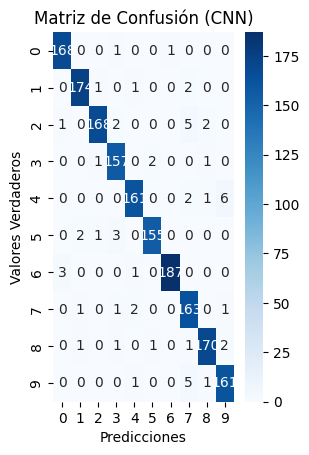

In [ ]:
plt.subplot(1, 2, 2)
cm_cnn = confusion_matrix(y_test, y_pred_cnn)
sns.heatmap(cm_cnn, annot=True, fmt="d", cmap="Blues")
plt.title("Matriz de Confusión (CNN)")
plt.xlabel("Predicciones")
plt.ylabel("Valores Verdaderos")

In [ ]:
plt.tight_layout()
plt.show()

<Figure size 640x480 with 0 Axes>

##Se visualizan ejemplos de imágenes con etiquetas y predicciones

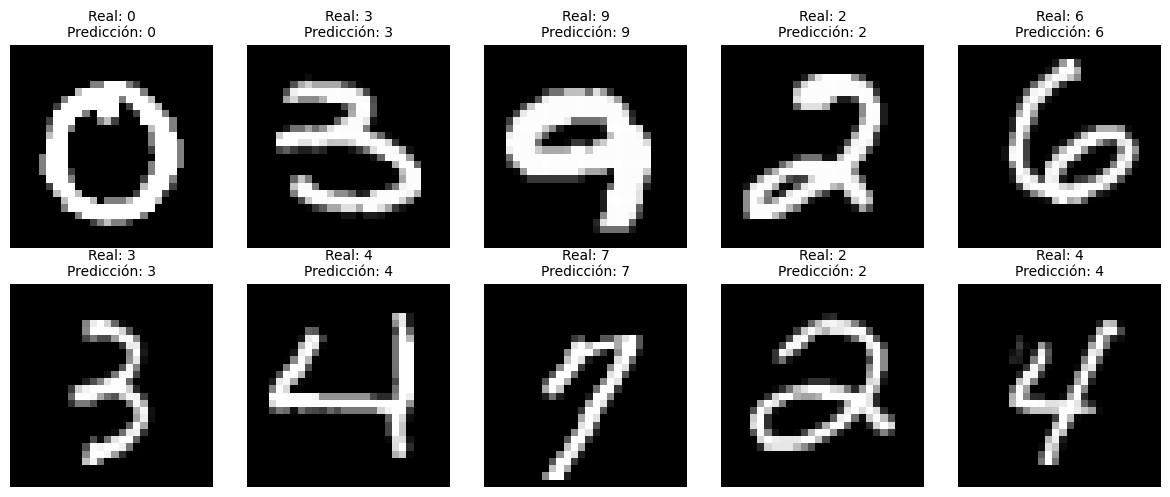

In [ ]:
plt.figure(figsize=(12, 5))

for i in range(10):
    plt.subplot(2, 5, i + 1)
    plt.imshow(X_test[i].reshape(28, 28), cmap="gray")
    plt.title(f"Real: {y_test[i]}\nPredicción: {y_pred_ann[i]}", fontsize=10)
    plt.axis("off")

plt.tight_layout()
plt.show()

##Se guardan los modelos entrenados

In [ ]:
ann_model.save("ann_model.h5")
cnn_model.save("cnn_model.h5")

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


###CONCLUSIONES:
1. Comparación de Modelos: Hemos entrenado y evaluado dos tipos de modelos de aprendizaje profundo, una Red Neuronal Artificial (ANN) y una Red Neuronal Convolucional (CNN), en el conjunto de datos MNIST.

2. Métricas de Rendimiento: Calculamos una variedad de métricas de rendimiento, incluyendo precisión, recuperación, F1-score y más, para ambas redes. Estas métricas proporcionan información sobre cuán bien cada modelo clasifica los dígitos escritos a mano.

3. Matrices de Confusión: Visualizamos las matrices de confusión para ambas redes, lo que nos permitió examinar en detalle cómo se comportaron en términos de clasificación de clases específicas.

4. Visualización de Ejemplos: También visualizamos ejemplos de imágenes reales junto con las etiquetas reales y las predicciones realizadas por los modelos. Esto ayudó a comprender mejor cómo se comportaron en casos individuales.

5. Resultados Similares: Observamos que ambas redes, la ANN y la CNN, obtuvieron resultados similares en términos de métricas de rendimiento. Esto sugiere que, en este conjunto de datos específico (MNIST), una ANN puede ser suficiente para lograr un buen rendimiento.

6. Versatilidad de las CNN: A pesar de la similitud en las métricas, es importante recordar que las CNN son especialmente adecuadas para tareas de visión por computadora y pueden mostrar ventajas significativas en conjuntos de datos más complejos o con imágenes de alta resolución.

7. Guardar Modelos: Finalmente, guardamos los modelos entrenados para su posterior uso o despliegue en aplicaciones prácticas.

En general, esta comparación entre una ANN y una CNN en MNIST resalta la importancia de seleccionar el modelo adecuado para una tarea específica y muestra cómo las métricas y la evaluación detallada pueden ayudar a tomar decisiones informadas sobre el uso de modelos de aprendizaje profundo en problemas de clasificación.